In [38]:
import numpy as np
import mahotas
import pandas as pd
import json
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [39]:
DATASET_FOLDER = "/Users/jiehyun/kaggle/input/hubmap-organ-segmentation/"
TRAIN_IMAGES = DATASET_FOLDER + "train_images"
TRAIN_ANNOT = DATASET_FOLDER + "train_annotations"
TRAIN_CSV = DATASET_FOLDER + "train.csv"

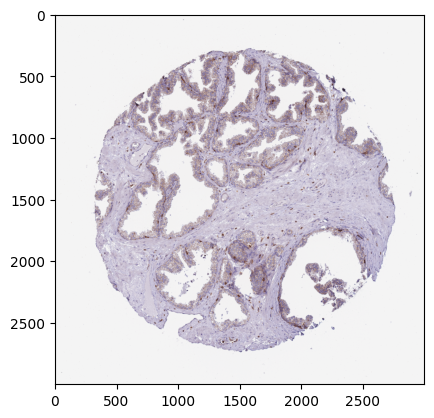

In [40]:
img = mahotas.imread(TRAIN_IMAGES + '/10044.tiff')
plt.imshow(img)

In [41]:
with open(TRAIN_ANNOT + '/10044.json') as json_file:
    data = json.load(json_file)

In [11]:
len(data)

9

In [12]:
print(len(data[0]))
print(len(data[1]))
print(len(data[2]))
print(len(data[3]))
print(len(data[4]))
print(len(data[5]))
print(len(data[6]))
print(len(data[7]))
print(len(data[8]))

101
93
108
70
75
53
45
320
140


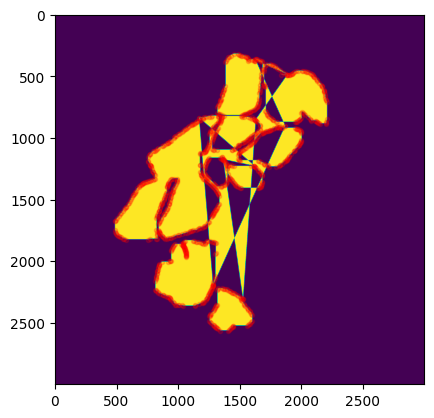

In [65]:
#reference: https://github.com/maftouni/binary_mask_from_json/blob/main/binary_mask_from_json.py
x_val = []
y_val = []
for i in range(len(data)):
    for j in range(len(data[i])):        
        #if data[i][j] != {}:
        shape1_x=data[i][j][0]
        shape1_y=data[i][j][1]
        x_val.append(shape1_x)
        y_val.append(shape1_y)

fig = plt.figure()

plt.imshow(img.astype(np.uint8)) 
plt.scatter(x_val, y_val, zorder=2, color='red', marker = '.', alpha= 0.2)

ab=np.stack((x_val, y_val), axis=1)
img2=cv2.drawContours(img, [ab], -1, (255, 255, 255), 1)

mask = np.zeros((img.shape[0],img.shape[1]))
img3=cv2.drawContours(mask, [ab], -1, 255, -1)

plt.imshow(mask)
#cv2.imwrite('10044.png', img3)


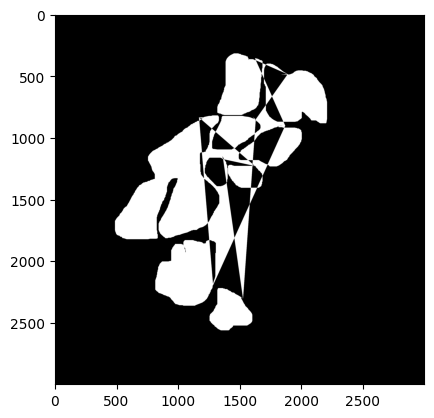

In [56]:
filled = np.zeros_like(img)
filled = cv2.fillPoly(filled, pts = [ab], color =(255,255,255))
im = Image.fromarray(filled)
plt.imshow(im)

In [57]:
redImg = np.zeros(img.shape, img.dtype)
redImg[:,:] = (0, 0, 255)
redMask = cv2.bitwise_and(redImg, redImg, mask=mask)
cv2.addWeighted(redMask, 1, img, 1, 0, img)

error: OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/core/src/arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'
